# The GitHub History of the Scala Language

Scala merupakan salah satu bahasa pemrograman yang penting untuk data scientist.
Scala merupakan open source, sehingga kita bisa melihat riwayat developmentnya.
Kita akan mencari tahu orang yang paling berpengaruh dalam developmentnya.

pulls_one = pulls_2011-2013.csv -> memuat informasi tentang pull request dari tahun 2011-2013

pulls_two = pulls_2014-2018.csv -> memuat informasi tentang pull request dari tahun 2014-2018

pull_files = pull_files.csv -> memuat tentang file yang dimodifikasi dari setiap pull request

In [1]:
# Importing pandas
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd

# Loading in the data
pulls_one = pd.read_csv('datasets/pulls_2011-2013.csv')
pulls_two = pd.read_csv('datasets/pulls_2014-2018.csv')
pull_files = pd.read_csv('datasets/pull_files.csv') 

menggabungkan DataFrame dan mengubah date ke bentuk UTC

pulls = pulls_one + pulls_two yang terdiri atas kolom [pid, user, date]

In [2]:
# Append pulls_one to pulls_two
pulls = pulls_one.append(pulls_two,ignore_index=True)

# Convert the date for the pulls object
pulls['date'] = pd.to_datetime(pulls["date"],utc=True)

C:\Users\ferna\AppData\Local\Temp\ipykernel_59896\2144079668.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pulls = pulls_one.append(pulls_two,ignore_index=True)


merge DataFrame untuk memudahkan dalam menganalisis

data = pulls + pull_files yang terdiri atas kolom [pid, user, date, file]

In [3]:
# Merge the two DataFrames
data = pulls.merge(pull_files,on="pid")

Kita perlu mengetahui terlebih dahulu tentang keadaan projeknya.
Kita penasaran tentang perkembangan dari kontribusi dari tahun 2011-2018 untuk setiap bulannya.
Terdapat beberapa cara, salah satunya dengan membuat kolom baru untuk bulan dan tahun.

data -> terdiri atas kolom [pid, user, date, file, month, year]

<AxesSubplot: xlabel='year,month'>

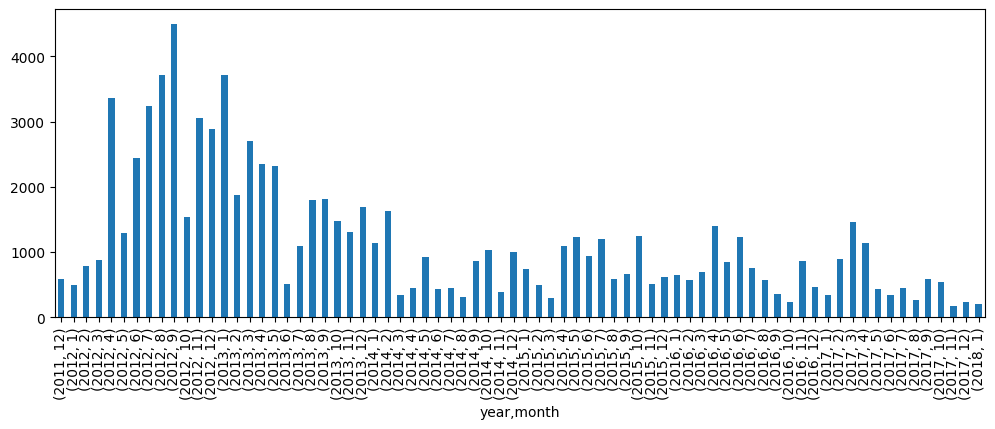

In [4]:
%matplotlib inline

# Create a column that will store the month
data['month'] = data["date"].dt.month

# Create a column that will store the year
data['year'] = data["date"].dt.year

# Group by the month and year and count the pull requests
counts = data.groupby(["year","month"])["pid"].count()

# Plot the results
counts.plot(kind='bar', figsize = (12,4))

Terdapat dua jenis komunitas, yaitu small community dan large community.
small community beberapa kendala salah satunya adalah enggan menerima pull request dari luar.
large community adalah sebaliknya.
Jadi, kita ingin mengetahui jumlah pull request dari  setiap user.

<AxesSubplot: xlabel='user'>

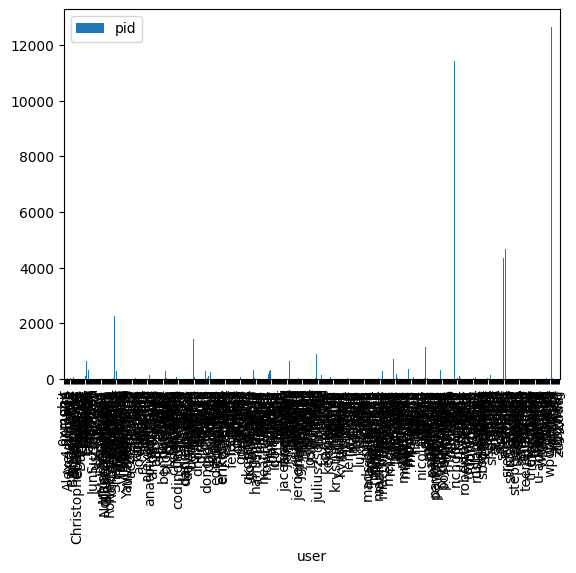

In [5]:
# Required for matplotlib
%matplotlib inline

# Group by the submitter
by_user = data.groupby("user").agg({"pid":"count"})

# Plot the histogram
# ... YOUR CODE FOR TASK 5 ...
by_user.plot(kind="bar")

Penting bagi kita untuk mengetahui area yang sering dikunjungi terkini.

last_10 -> 10 pull request terkini

joined_pr -> data tentang 10 pull request dan file terkini

In [6]:
# Identify the last 10 pull requests
last_10 = pulls.nlargest(10,"date",keep="last")

# Join the two data sets
joined_pr = last_10.merge(pull_files,on="pid")

# Identify the unique files
files = set(joined_pr["file"])

# Print the results
print(files)

{'test/files/run/t8348/Test.scala', 'src/compiler/scala/tools/nsc/profile/Profiler.scala', 'test/files/pos/t5638/Usage.scala', 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala', 'src/library/scala/Predef.scala', 'test/files/neg/leibniz-liskov.check', 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala', 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala', 'test/files/pos/t10686.scala', 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala', 'test/files/pos/t9291.scala', 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala', 'doc/License.rtf', 'test/files/pos/leibniz_liskov.scala', 'src/library/scala/concurrent/Lock.scala', 'test/files/pos/leibniz-liskov.scala', 'test/files/pos/t10568/Impl.scala', 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala', 'test/files/pos/t5638/Among.java', 'src/compiler/scala/reflect/reify/phases/Calculate.scala', 'src/scalap/decoder.properties', 'doc/LICENSE.md', 'LICENSE', 'project/VersionUtil.scala', 'test/files

Siapa pembuat pull request terbanyak?
Jadi, kita ingin memberikan pull request kepada orang yang mampu dengan melihar riwayat contributionnya.
Kita ingin mengetahui top 3 developer yang mengubah file tersebut 

In [7]:
# This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the commits that changed the file
file_pr = data[data["file"] == file]

# Count the number of changes made by each developer
author_counts = file_pr.groupby("user")["pid"].count()

# Print the top 3 developers
# ... YOUR CODE FOR TASK 7 ...
print(author_counts.nlargest(3))

user
xeno-by     11
retronym     5
soc          4
Name: pid, dtype: int64


Siapa yang membuat 10 pull requset terakhir?

joined_pr -> gabungan data tentang file yang dituju yang tediri atas kolom [pid, file, user, date]

In [8]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = pull_files[pull_files["file"] == file]

# Merge the obtained results with the pulls DataFrame
joined_pr = file_pr.merge(pulls,on="pid")

# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10,"date")["user"])

# Printing the results
print(users_last_10)

{'soc', 'retronym', 'bjornregnell', 'zuvizudar', 'xeno-by', 'starblood'}


Pull request dari developer xenoby dan soc.
Kita ingin mengetahui developer yang terlibat terhadap projek terkini.

<AxesSubplot: xlabel='date'>

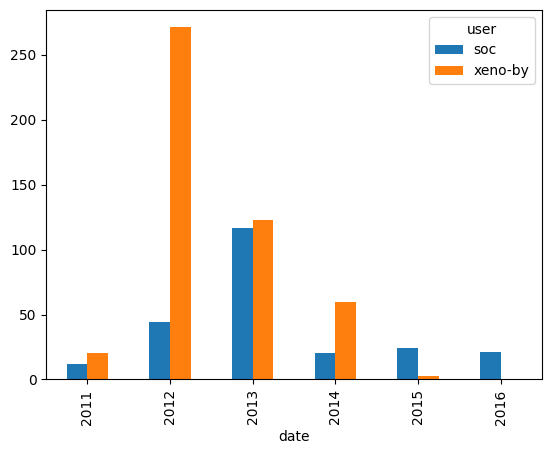

In [9]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls["user"].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby(["user", by_author["date"].dt.year]).agg({'pid': 'count'}).reset_index()

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
# ... YOUR CODE FOR TASK 9 ...
counts_wide.plot(kind="bar")

Kita ingin mengetahui gambaran contribution yang dilakukan oleh setiap developer.

<AxesSubplot: xlabel='date'>

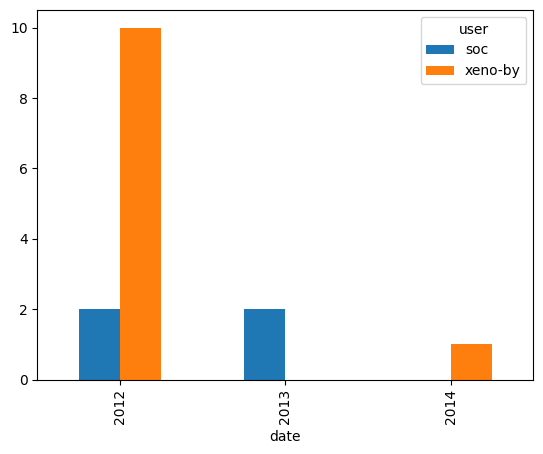

In [10]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data["user"].isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author["file"] == file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index="date",columns="user",values="pid",fill_value=0)

# Plot the results
by_file_wide.plot(kind='bar')